In [3]:
!pip install --upgrade bottleneck --user

In [36]:
!pip install requests beautifulsoup4

In [81]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import requests
from bs4 import BeautifulSoup

In [2]:
#Data path
data_path = "D:/Users/archive/train"
image_size = 48

In [3]:
#Function for loading data
def load_data(data_path, image_size):
    data = []
    labels = []
    
    for folder in os.listdir(data_path):
        label = folder
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path): 
            for file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (image_size, image_size))
                    data.append(img)
                    labels.append(label)
    
    return np.array(data), np.array(labels)

## Train

In [4]:
#Loading Data
data_train, labels_train = load_data(data_path, image_size)

In [6]:
#Checking that the data is not empty
if len(data_train) == 0:
    raise ValueError("No images found in the specified path.")

In [8]:
data_train.shape

(28709, 48, 48)

In [9]:
labels_train.shape

(28709,)

In [10]:
#Data Normalization
data_train = data_train / 255.0
data_train = data_train.reshape(data_train.shape[0], image_size, image_size, 1)

In [11]:
#Class Label Encoding
label_encoder = LabelEncoder()
labels_train_encoder = label_encoder.fit_transform(labels_train)
labels_train_encoder = to_categorical(labels_train_encoder)

In [12]:
labels_train[2001]

'angry'

In [13]:
labels_train_encoder[2001]

array([1., 0., 0., 0., 0., 0., 0.])

In [17]:
labels_train[10000]

'happy'

In [18]:
labels_train_encoder[10000]

array([0., 0., 0., 1., 0., 0., 0.])

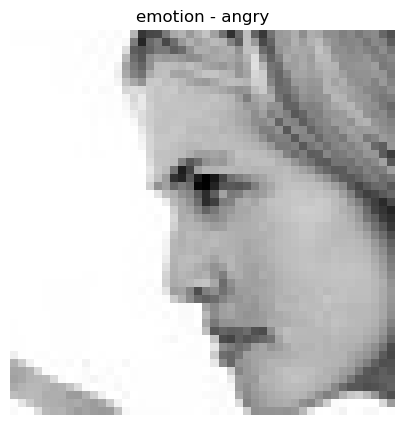

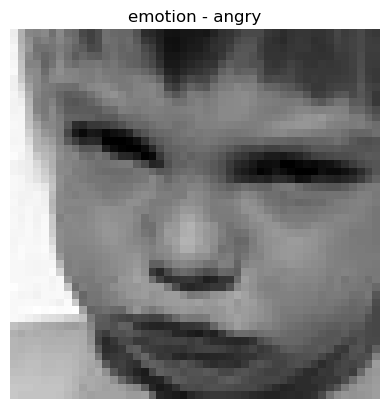

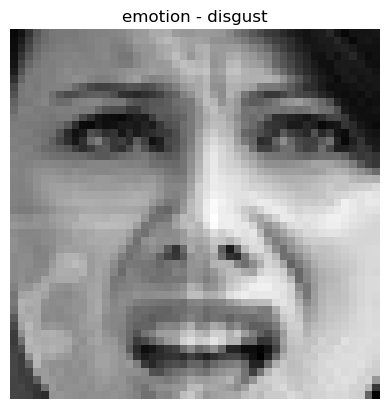

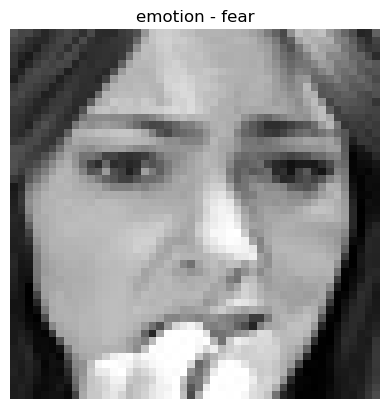

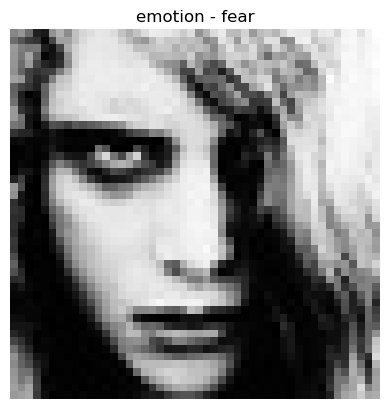

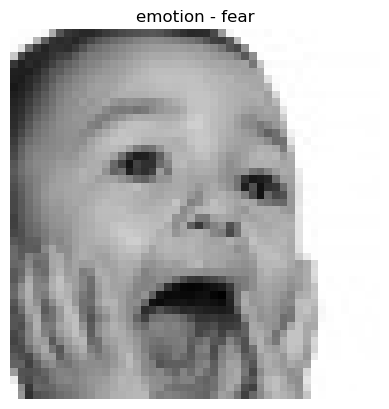

In [106]:
plt.figure(figsize=(20, 5))
for i in range(3000, 6000, 500):
    plt.imshow(data_train[i], cmap='gray')
    plt.title(f'emotion - {labels_train[i]}')
    plt.axis('off')
    plt.show()

## Test

In [20]:
data_path_test = "D:/Users/archive/test"
data_test, labels_test = load_data(data_path, image_size)

In [21]:
#Checking that the data is not empty
if len(data_test) == 0:
    raise ValueError("No images found in the specified path.")

In [22]:
data_test.shape

(28709, 48, 48)

In [23]:
labels_test.shape

(28709,)

In [24]:
#Data Normalization
data_test = data_test / 255.0
data_test = data_test.reshape(data_test.shape[0], image_size, image_size, 1)

In [25]:
#Class Label Encoding
label_encoder = LabelEncoder()
labels_test_encoder = label_encoder.fit_transform(labels_test)
labels_test_encoder = to_categorical(labels_test_encoder)

## Model emotion

In [26]:
#Creating Model
model = Sequential([
    Input(shape=(image_size, image_size, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

#Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(data_train)

In [28]:
#Model training
history = model.fit(datagen.flow(data_train, labels_train_encoder, batch_size=32), 
                    epochs=20, 
                    validation_data=(data_test, labels_test_encoder))

#Saving the model
model.save('emotion_recognizer.keras')

Epoch 1/20


D:\Users\irina\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.2379 - loss: 1.8296 - val_accuracy: 0.3005 - val_loss: 1.7188
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.2965 - loss: 1.7233 - val_accuracy: 0.3963 - val_loss: 1.5292
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.3714 - loss: 1.5911 - val_accuracy: 0.4623 - val_loss: 1.3957
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4246 - loss: 1.4823 - val_accuracy: 0.5045 - val_loss: 1.3025
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.4609 - loss: 1.4050 - val_accuracy: 0.5267 - val_loss: 1.2557
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4786 - loss: 1.3771 - val_accuracy: 0.5329 - val_loss: 1.2121
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4916 - loss: 1.3334 - val_accuracy: 0.5461 - val_loss: 1.1885
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.5025 - loss: 1.3177 - val_accurac

In [29]:
#Model evaluation
loss, accuracy = model.evaluate(data_test, labels_test_encoder)
print(f'Test accuracy: {accuracy * 100:.2f}%')

898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5324 - loss: 1.1666
Test accuracy: 61.72%


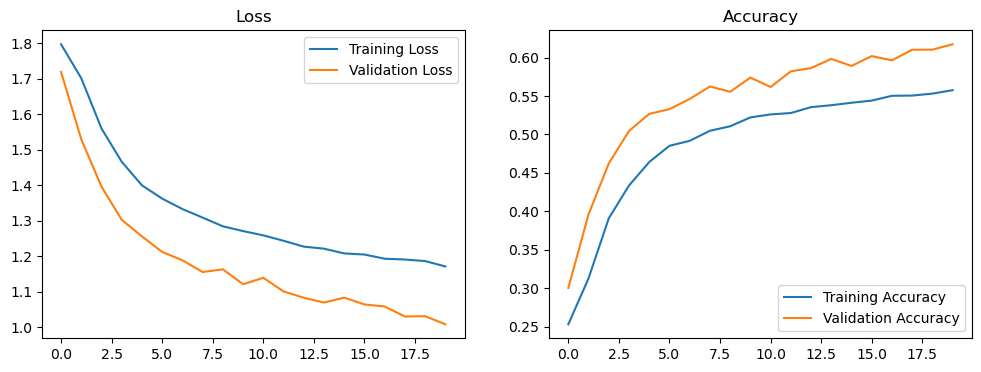

In [30]:
#Visualization of learning history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

## Music Recomend

In [35]:
np.unique (labels_train)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

Let's take the music from https://www.last.fm

In [100]:
urls = ['rock', 'blues', 'classical', 'dance', 'indie', 'acoustic', 'reggae']
music_dict = {}
artists_dict = {}
combined = {}

for url in urls:
    responce = requests.get(f'https://www.last.fm/tag/{url}')
    if response.status_code != 200:
        print(f"Failed to retrieve data from https://www.last.fm/tag/{url}")
    soup = BeautifulSoup(response.content, 'html.parser')
    track_elements = soup.find_all(class_='chartlist-name')
    artists = soup.find_all(class_='chartlist-artist')
    #Extracting track names and artists
    music_dict = [element.text.strip() for element in track_elements]
    artists_dict = [element.text.strip() for element in artists]
    combined[f'{url}'] = [item1 + ' - ' + item2 for item1, item2 in zip(artists_dict1, music_dict1)]

In [101]:
combined["angry"] = combined.pop("rock")
combined["disgust"] = combined.pop("blues")
combined["fear"] = combined.pop("classical")
combined["happy"] = combined.pop("dance")
combined["neutral"] = combined.pop("indie")
combined["sad"] = combined.pop("acoustic")
combined["surprise"] = combined.pop("reggae")

In [102]:
combined

{'angry': ['Nirvana - Smells Like Teen Spirit',
  'The Killers - Mr. Brightside',
  'Radiohead - Creep',
  'Nirvana - Come as You Are',
  'Gorillaz - Feel Good Inc.',
  'Coldplay - Yellow',
  'Coldplay - Viva la Vida',
  'Radiohead - Karma Police',
  'Radiohead - No Surprises',
  'Red Hot Chili Peppers - Californication'],
 'disgust': ['Nirvana - Smells Like Teen Spirit',
  'The Killers - Mr. Brightside',
  'Radiohead - Creep',
  'Nirvana - Come as You Are',
  'Gorillaz - Feel Good Inc.',
  'Coldplay - Yellow',
  'Coldplay - Viva la Vida',
  'Radiohead - Karma Police',
  'Radiohead - No Surprises',
  'Red Hot Chili Peppers - Californication'],
 'fear': ['Nirvana - Smells Like Teen Spirit',
  'The Killers - Mr. Brightside',
  'Radiohead - Creep',
  'Nirvana - Come as You Are',
  'Gorillaz - Feel Good Inc.',
  'Coldplay - Yellow',
  'Coldplay - Viva la Vida',
  'Radiohead - Karma Police',
  'Radiohead - No Surprises',
  'Red Hot Chili Peppers - Californication'],
 'happy': ['Nirvana - Sm

In [103]:
def recommend_song(emotion):
    return random.choice(combined[emotion])

In [104]:
#Example
image_path = "D:/images.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (image_size, image_size))
img = img / 255.0
img = img.reshape(1, image_size, image_size, 1)

prediction = model.predict(img)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
emotion = predicted_label[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [105]:
song = recommend_song(emotion)
print(f'Predicted Emotion: {emotion}')
print(f'Recommended Song: {song}')

Predicted Emotion: sad
Recommended Song: Radiohead - No Surprises
